# Import Arrays from fpnb.py

importing Jupyter notebook from fpnb.ipynb


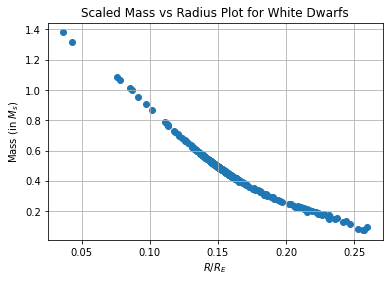

In [1]:
# Assuming the grader will be using Jupyter.
# Otherwise, separate .py files should be ge
# nerated and they should be imported here.
import import_ipynb
from fpnb import rads_earthed
from fpnb import mass
from fpnb import G
from fpnb import Ms
from fpnb import Re

# Import Other Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Fitting

Rearrange the order of radius and mass to make radiuses have an increasing order.

In [3]:
list1, list2 = zip(*sorted(zip(rads_earthed, mass)))
r = np.array(list1)
m = np.array(list2)

Defining
\begin{equation}
K'=\frac{K}{(0.4)G}
\end{equation}
and
\begin{equation}
M'=M^{\frac{1}{3}}, 
R'=R^{-1}
\end{equation}

the approximate relation between $R^{-1}$ and $M'$ for n=1.5 is
\begin{equation}
K'R^{-1}\approx M^{\frac{1}{3}}
\end{equation}
\begin{equation}
K'R'=M'
\end{equation}

In [4]:
# define M' and R'
m_prime = m**(1/3)
r_prime = 1/r

Text(0.5, 1.0, 'semilogx plot')

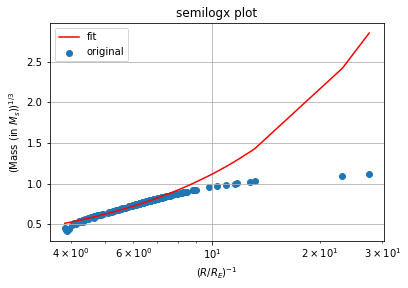

In [5]:
plt.scatter(r_prime, m_prime, label = "original")
plt.xlabel("$(R/R_E)^{-1}$")
plt.ylabel("(Mass (in $M_s$))$^{1/3}$")
plt.grid()

# choose number of stars (whose mass is large) to discard
dis = 30
# set polynomial degree to 1, since it is a linear fit
deg = 1
# perform fit
z = np.polyfit(r_prime[dis:-1], m_prime[dis:-1], deg)
p = np.poly1d(z)
plt.semilogx(r_prime,p(r_prime), 'r', label= "fit")
plt.legend()
plt.title("semilogx plot")

# Extracting K

Extract K from the slope of the fit
\begin{equation}
K = slope \times (0.4) \times G
\end{equation}

In [6]:
K = z[0] * (0.4) * G
print("Slope is", z[0])
print("K is", K)

Slope is 0.09864242276477804
K is 2.632801774864121e-12


# Central Density $\rho_c$ 

Since $n_*$ is found as $3/2$, the following formula gives us $\rho_c$:
\begin{equation}
\rho_c = \left(\frac{5K}{8\pi G}\right)^{3} \left(\frac{\xi_n}{R}\right)^{6}
\end{equation}

In [7]:
xi_n = 3.65
rho_c = (5*K/(8*np.pi*G))**(3) * (xi_n/r)**(6)

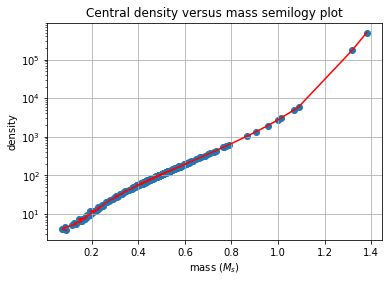

In [8]:
plt.figure()
plt.semilogy(m, rho_c,'r')
plt.scatter(m, rho_c)
plt.title("Central density versus mass semilogy plot")
plt.xlabel("mass ($M_s$)")
plt.ylabel("density")
plt.grid()